In [ ]:
1. iterater(이터레이터)
: 데이터를 차례대로 꺼낼 수 있도록 해주는 객체

for i in range(100): 0~99까지 100개의 숫자를 꺼낸다!!(만들어준다x)
    1)__iter()__가 만들어진다
    2)__next()__가 수행된다
    3)i에 0이 전달된다
--> range()를 사용하면, 이터레이터가 생성되어 실행되는 것이다.
    
2. iterable(이터러블:반복 가능한 객체)
    [1,2,3].__iter__() # 이터러블 함수를 만들어서 객체로 사용가능
    ex) list, set, dic, str, ...

In [2]:
dir([1,2,3])
it=[1,2,3].__iter__() # 이터러블

In [4]:
it.__next__()

2

In [9]:
# class 이터레이터명:
#     def __iter__(self):
#         code
#     def __next__(self):
#         code

class Counter:
        def __init__(self,stop):# 0,1,2번 붕어빵 만드는 것이 목표!!
            self.cur=0 #현재 붕어빵 번호
            self.stop=stop #붕어빵 굽기 종료 시점
            
        def __iter__(self):
            return self
        
        def __next__(self):
            if self.cur<self.stop:
                r=self.cur
                self.cur+=1
                return r
            else:
                raise StopIteration
            
    
for i in Counter(3): #붕어빵기계(붕어빵3마리만들어라)
    print(i) #0,1,2

0
1
2


In [10]:
a,b,c=Counter(3)

In [11]:
a

0

In [ ]:
2. 제너레이터:이터레이터를 생성해주는 함수
    -yield 키워드 사용하여 생성

In [13]:
def num_gen():
    yield 1
    yield 2
    yield 3
    
for i in num_gen():
    print(i)

1
2
3


In [15]:
# 변수=next(제너레이터 객체)
g=num_gen()
next(g)

1

In [17]:
def myGen():
    i=0
    while True:
        i+=1
        yield i

In [18]:
for i in myGen():
    print(i)
    if i>5:
        break

1
2
3
4
5
6


In [ ]:
data가 많을 때는, training(validation), test로 나뉜다(정석)
data가 부족할 때는, k-hold(cross validation)

In [ ]:
Dense(출력 뉴런 수, input_dim 입력뉴런수,activation func)

In [ ]:
conv2D(필터 수, (x*x)필터크기, padding("SAME(기존사이즈유지)/VALID(패딩없이)"))

In [ ]:
CNN 모델 만드는 과정
1. 문제 정의
- 다중분류, 입력:도형이미지, 출력:각 도형일 확률 
        
2. data 수집(데이터 부족시, 데이터 생성)
- 케라스는 ImageDataGenerator를 사용하여 
  데이터 증식, 이미지 파일 학습 가능

3. 모델 생성

4. 학습

5. 평가

In [19]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import *
from keras.layers.convolutional import *
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [34]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [35]:
train_gen=train_datagen.flow_from_directory(
'/Users/user/Downloads/hand/handwriting_shape/train',
target_size=(24,24),
class_mode='categorical',
    batch_size=3 # batch_size:학습시키는 속도
)

test_gen=test_datagen.flow_from_directory(
'/Users/user/Downloads/hand/handwriting_shape/test',
target_size=(24,24),
class_mode='categorical',
    batch_size=3 # batch_size:학습시키는 속도
)


Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [32]:
type(train_gen)
for x,y in train_gen:
    print(x)
    print("="*80)
    print(y)
    print("="*80)
    print(x.shape)
    print("="*80)
    print(y.shape)
    break

[[[[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1. 

In [ ]:
모델 생성

1. conv layer: 입력(24*24), 채널(3), 필터(3*3)
    필터 갯수(32), 활성화 함수(relu)
2. pooling: 크기(2*2)
3. flatten(fully-connected를 수행하기 위해 flaten)
4. dense layer
    :dense1의 출력 갯수(128), 활성화 함수(relu)
     dense2의 출력 갯수(3), 활성화 함수(softmax)

In [40]:
model=Sequential() # 1~4까지의 과정 전체를 모델이라고 한다

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(24,24,3)))
# 입력이미지(none개의 이미지가 22*22사이즈로 32개필터거친뎁쓰로 전달되어진다)
# conv2d 수행시, padding=valid가 default
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 22, 22, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               819328    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 387       
Total params: 839,107
Trainable params: 839,107
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# 케라스 모델 학습 함수 : fit()

# fit_generator: 제너레이터로 생성된 데이터를 학습시킬 때, 사용하는 함수

In [44]:
model.fit_generator(train_gen,steps_per_epoch=15,# 1epoch=45,batch=3이므로
                   epochs=100, validation_data=test_gen, validation_steps=5)

W0820 12:06:30.313026 11528 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0820 12:06:30.367997 11528 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
15/15 [==============================] - 1s 76ms/step - loss: 1.1656 - acc: 0.6000 - val_loss: 0.7189 - val_acc: 0.8667
Epoch 2/100
15/15 [==============================] - 0s 17ms/step - loss: 0.3784 - acc: 0.9556 - val_loss: 0.2919 - val_acc: 0.9333
Epoch 3/100
15/15 [==============================] - 0s 23ms/step - loss: 0.0724 - acc: 1.0000 - val_loss: 0.2089 - val_acc: 0.9333
Epoch 4/100
15/15 [==============================] - 0s 24ms/step - loss: 0.0109 - acc: 1.0000 - val_loss: 0.0412 - val_acc: 1.0000
Epoch 5/100
15/15 [==============================] - 0s 23ms/step - loss: 0.0094 - acc: 1.0000 - val_loss: 0.2072 - val_acc: 0.9333
Epoch 6/100
15/15 [==============================] - 0s 24ms/step - loss: 5.6265e-04 - acc: 1.0000 - val_loss: 0.1313 - val_acc: 0.9333
Epoch 7/100
15/15 [==============================] - 0s 24ms/step - loss: 4.2826e-04 - acc: 1.0000 - val_loss: 0.1014 - val_acc: 0.9333
Epoch 8/100
15/15 [==============================] - 0s 21ms/step - 

15/15 [==============================] - 0s 18ms/step - loss: 2.5392e-06 - acc: 1.0000 - val_loss: 0.0673 - val_acc: 0.9333
Epoch 62/100
15/15 [==============================] - 0s 18ms/step - loss: 2.3815e-06 - acc: 1.0000 - val_loss: 0.0670 - val_acc: 0.9333
Epoch 63/100
15/15 [==============================] - 0s 17ms/step - loss: 2.2981e-06 - acc: 1.0000 - val_loss: 0.0601 - val_acc: 0.9333
Epoch 64/100
15/15 [==============================] - 0s 18ms/step - loss: 2.1471e-06 - acc: 1.0000 - val_loss: 0.0598 - val_acc: 0.9333
Epoch 65/100
15/15 [==============================] - 0s 18ms/step - loss: 2.0610e-06 - acc: 1.0000 - val_loss: 0.0606 - val_acc: 0.9333
Epoch 66/100
15/15 [==============================] - 0s 18ms/step - loss: 1.9511e-06 - acc: 1.0000 - val_loss: 0.0616 - val_acc: 0.9333
Epoch 67/100
15/15 [==============================] - 0s 19ms/step - loss: 1.8663e-06 - acc: 1.0000 - val_loss: 0.0614 - val_acc: 0.9333
Epoch 68/100
15/15 [==============================] - 

In [47]:
scores=model.evaluate_generator(test_gen,steps=5)
print("%s: %.2f%%",model.metrics_names[1],scores[1]*100)

%s: %.2f%% acc 93.33333373069763


In [ ]:
예측 결과를 클래스 벡터로 표현

In [51]:
output=model.predict_generator(test_gen,steps=5)
np.set_printoptions(formatter={'float':lambda x:"{0:0.3f}".format(x)})
print(test_gen.class_indices) # test데이터의 인덱스를 출력해줌 --> 가독성위해 사용
print(output)

{'circle': 0, 'rectangle': 1, 'triangle': 2}
[[0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.000 0.016 0.984]
 [0.000 0.000 1.000]
 [0.000 0.001 0.999]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.000 0.001 0.999]]


In [52]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
# from keras.preprocessing.image import image 해도된다

In [89]:
data_aug_gen=ImageDataGenerator(
rescale=1./255,
rotation_range=15, # 회전각도
    width_shift_range=0.5,
    height_shift_range=0.5,
    zoom_range=[0.8,1.2], # 0.8~2.0사이의 값으로 줌해라 
    fill_mode='nearest',
    vertical_flip=True
#     shear_range=0.1
)

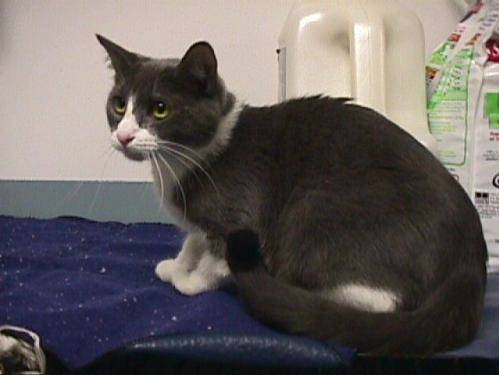

In [90]:
img=load_img('/Users/user/Downloads/dogs-vs-cats/train/train/cat.4.jpg')
img

In [91]:
x=img_to_array(img)
x=x.reshape((1,)+x.shape)
np.shape(x)

(1, 375, 499, 3)

In [92]:
변형된 이미지 50개 생성하기

SyntaxError: invalid syntax (<ipython-input-92-2e3bd373ccb9>, line 1)

In [93]:
# import os
# os.mkdir('/Users/user/Downloads/dogs-vs-cats/copy')
i=0
for data in data_aug_gen.flow(x,batch_size=1,save_to_dir='/Users/user/Downloads/dogs-vs-cats/copy',
                              save_format='png',save_prefix='sample'):
        i+=1
        if i>50:
            break